# **PCA and t-SNE Project: Auto MPG**

-----------------------------
## **Context**
-----------------------------

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.


-----------------------------
## **Objective**
-----------------------------
The objective of this problem is to **explore the data, reduce the number of features by using dimensionality reduction techniques like PCA and t-SNE, and extract meaningful insights**.

-----------------------------
## **Dataset**
-----------------------------
There are 8 variables in the data:

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

## **Importing the necessary libraries and overview of the dataset**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

### **Loading the data**

In [2]:
data = pd.read_csv("auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


### **Checking the info of the data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

- There are **398 observations and 8 columns** in the data.
- **All variables except horsepower and car name are of numeric data type.**
- The horsepower must be a numeric data type. We will explore this further.

## **Data Preprocessing and Exploratory Data Analysis**

### **Checking the unique values in the 'car name' column**

In [5]:
data["car name"].nunique()

305

- The column 'car name' is of object data type containing a lot of unique entries and would not add values to our analysis. We can drop this column.

In [6]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()

# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

### **Checking values in the horsepower column**

In [7]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False

data[hpIsDigit['horsepower'] == False]   # Take only those rows where horsepower is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


**Observations:**
- There are **6 observations where horsepower is ?**. We can consider these values as **missing values**.
- We can **impute these missing values and change the data type** of horsepower column.
- First, we need to **replace the ? with np.nan**.

In [8]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [9]:
# Imputing the missing values with the median value of the column horsepower
data.horsepower.fillna(data.horsepower.median(), inplace = True)

data['horsepower'] = data['horsepower'].astype('float64')  # Converting the horsepower column from object data type to float

### **Summary Statistics**

- Check the summary statistics of the data

In [12]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Write your observations here:** There are no available motors with more than 8 cylinders. Also the mean displacement is of 193.42 of engine size. And there are vehicles as heavy as 5140 kg and as light as 398 kg.

### **Let's check the distribution and outliers for each column in the data**

- Create histograms to check the distribution of all the variables
- Create boxplots to visualize the outliers for all the variables

mpg
Skew : 0.46


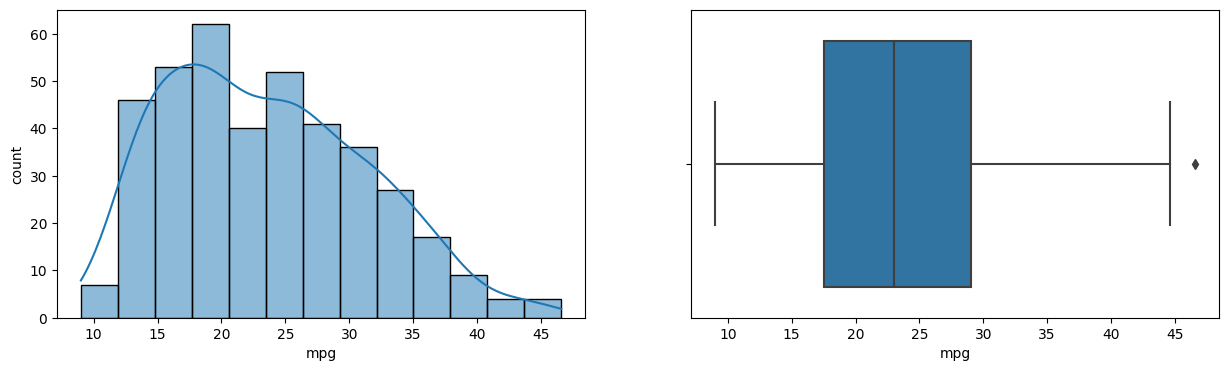

cylinders
Skew : 0.53


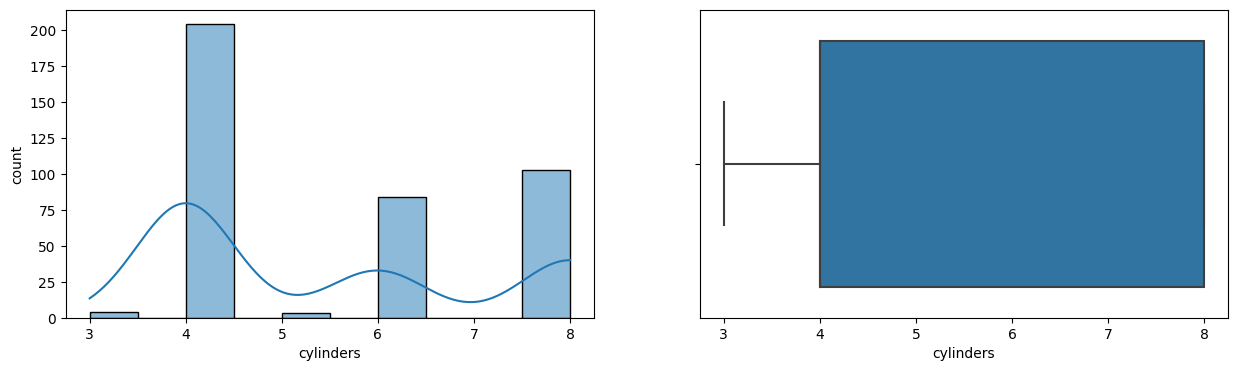

displacement
Skew : 0.72


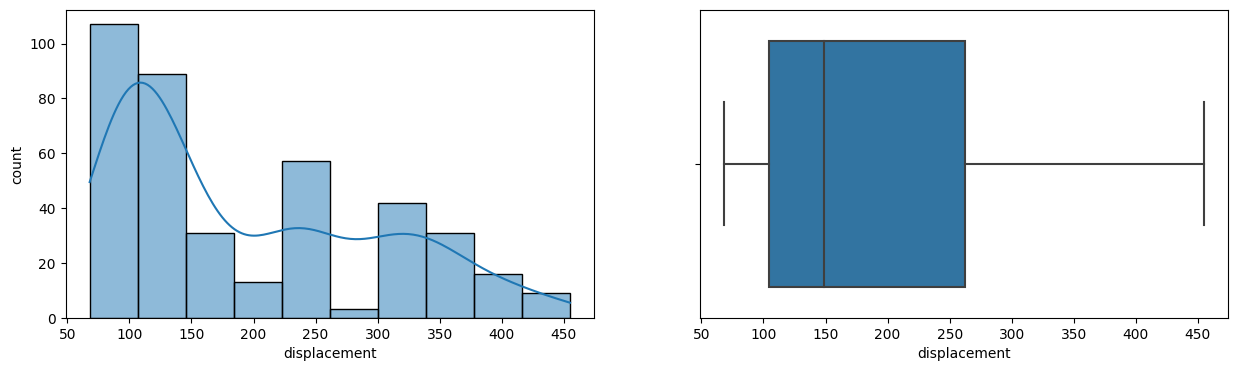

horsepower
Skew : 1.11


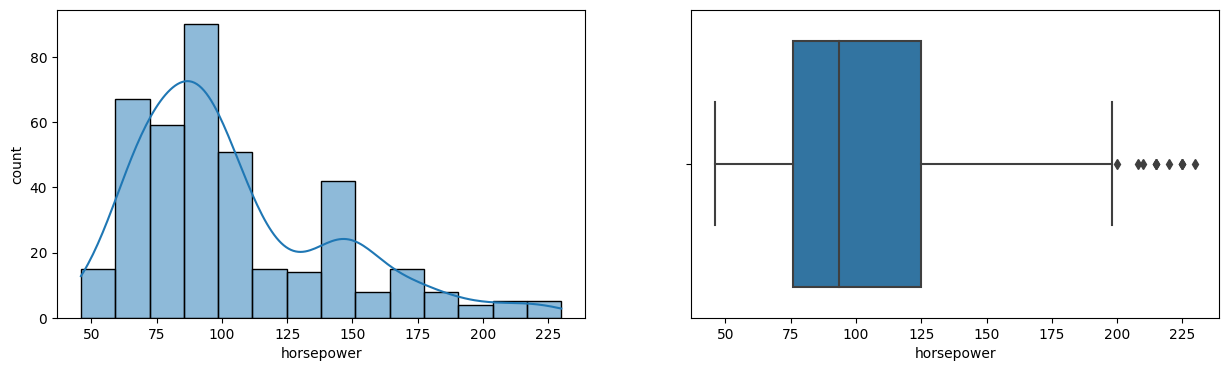

weight
Skew : 0.53


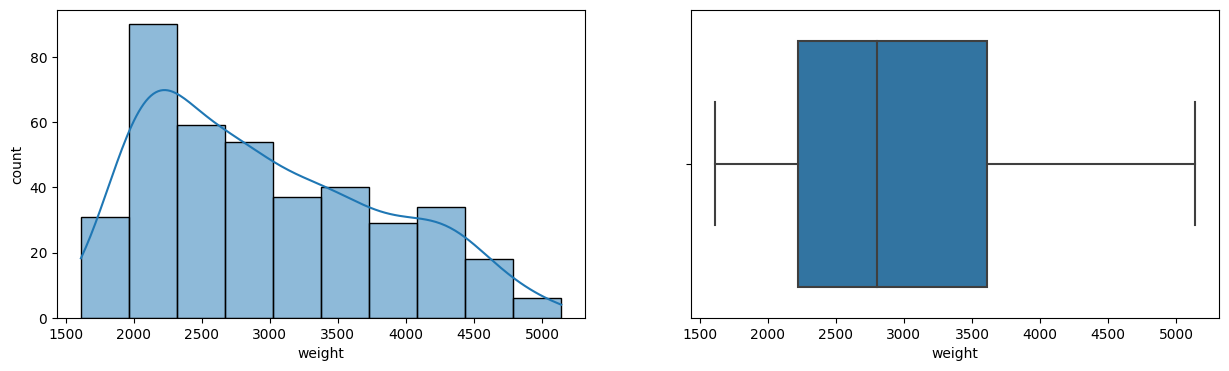

acceleration
Skew : 0.28


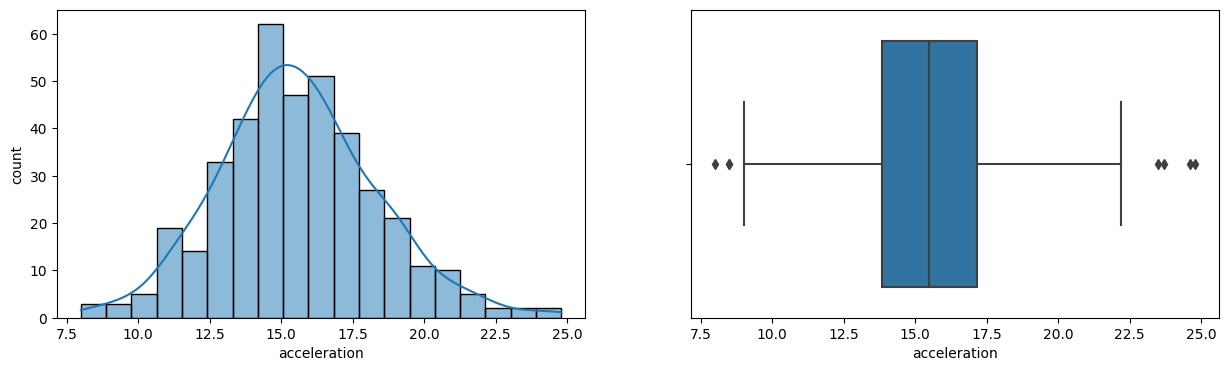

model year
Skew : 0.01


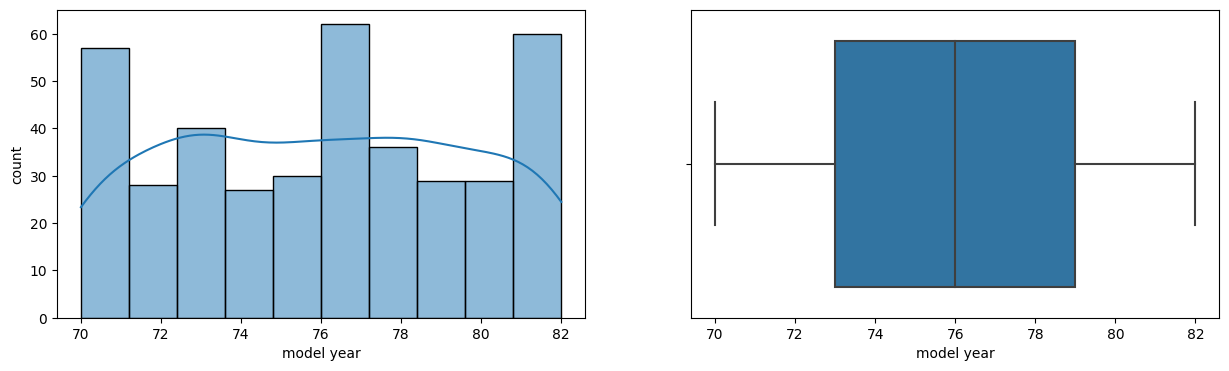

In [15]:
# Complete the below code by filling the blanks, before running this cell, to avoid any errors

for col in data.columns:
    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    sns.histplot(data[col], kde=True) # Complete the code

    plt.ylabel('count')

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col]) # Complete the code

    plt.show()

**Write your observations here:** Miles per gallon are usually between 15 and 35 mpg, there are not much of 45 mp neither of 10 mpg. So there is a standard of mpg independently of the size of the vehicle.

The most common number of cylinders is 4. This is actually a standard. As they are more common, these consume less gas than a 8 cylinders, so this can explain why there are no big consumption of gas and there are no small consumption of gas.
This is related with the horsepower too. As the number of cylinders increase, also increase the horsepower.That could be why horsepower stays low, as there not much vehicles of more than 4 cylinders.

But the acceleration stays almost in a centered possition of the histogram.



### **Checking the correlation**

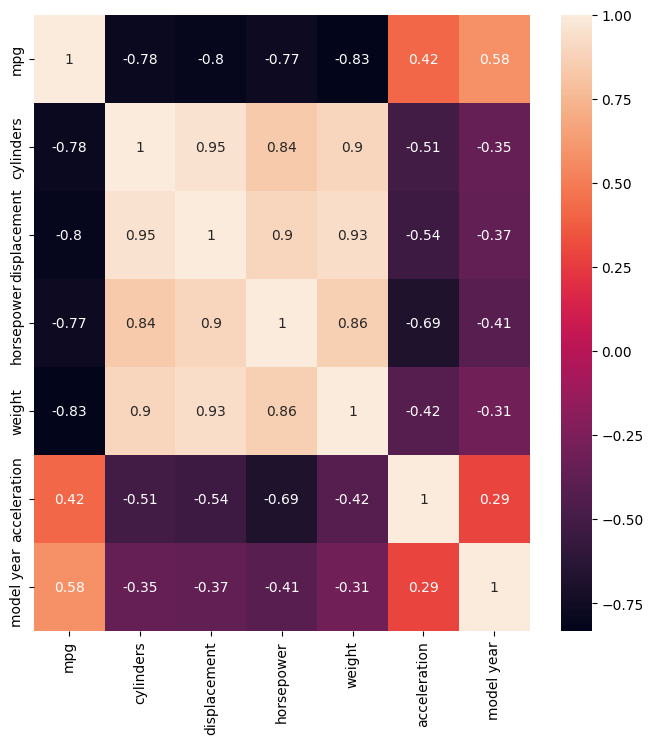

In [16]:
plt.figure(figsize = (8, 8))

sns.heatmap(data.corr(), annot = True)

plt.show()

**Observations:**
- The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
- model year is positively correlated with mpg.

### **Scaling the data**

In [17]:
# Scaling the data
scaler = StandardScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [18]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

#### **Applying the PCA algorithm with number of components equal to the total number of columns in the data**

In [58]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
# Apply the PCA algorithm with random_state = 1
pca = PCA(n_components=n, random_state = 1) # Complete the code

# Fit and transform the pca function on scaled data
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled)) # Complete the code

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

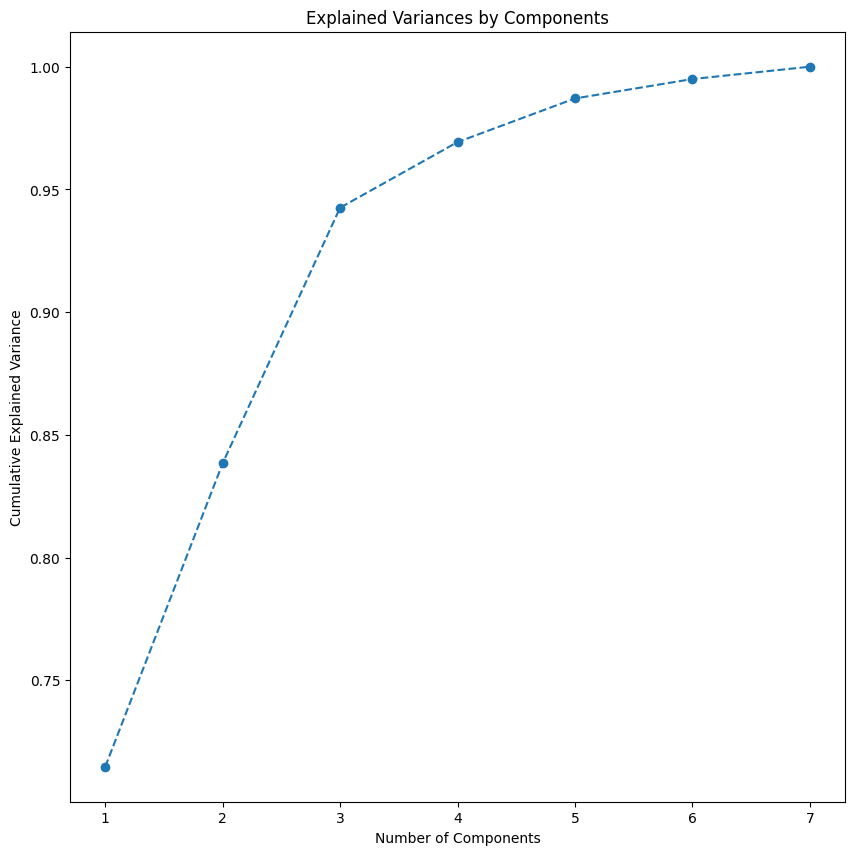

In [20]:
# Visualize the explained variance by individual components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

In [21]:
# Finding the least number of components that can explain more than 90% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


**Write your observations here:** The main reason why we apply PCA is to reduce dimensionality. Of course, the best explained variance is reached when we have a number of components of 7 (1) because 7 is the original number of columns available in the dataset. So to avoid overfitting and keeping a small number of components, the number of components chose for a 90% of variance is 3. So n components = 3 is the chosen number after dimensionality reduction.

In [43]:
pc_comps = ['PC1', 'PC2', 'PC3']

data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)

data_pca.T
data_pca

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
PC1,-0.40,0.42,0.43,0.42,0.41,-0.28,-0.23
PC2,-0.21,-0.19,-0.18,-0.09,-0.22,0.02,-0.91
PC3,-0.26,0.14,0.10,-0.17,0.28,0.89,-0.02


#### **Interpret the coefficients of the first three principal components from the below DataFrame**

In [23]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'

    elif val >= 0.40:
        return 'background: skyblue'

data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Write your observations here:** In Principal Component Analysis (PCA), negative values indicate a component score that is lower than average. PCA scores are usually centered at zero, where zero represents an observation with an average score on the PCA.


#### We can also visualize the data in 2 dimensions using the first two principal components

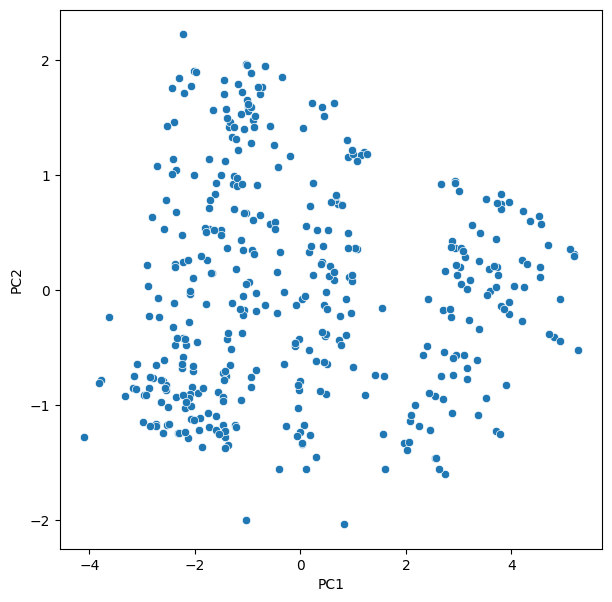

In [24]:
plt.figure(figsize = (7, 7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Let's try adding hue to the scatter plot**

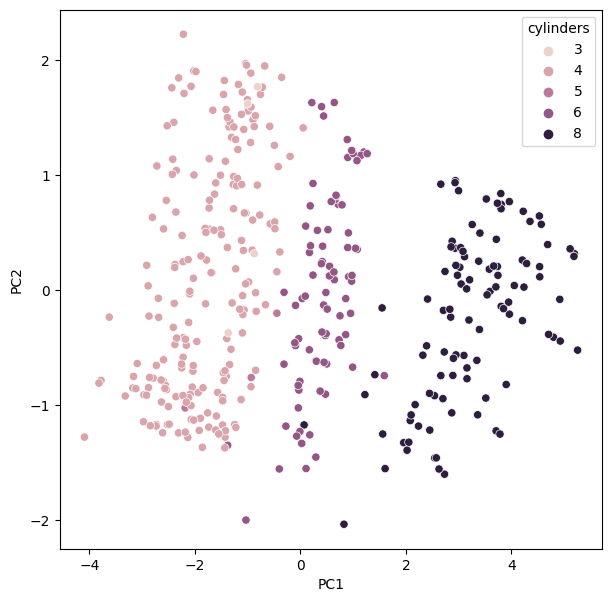

,0,1,2,3,4,5,6,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,2.661556,0.918577,-0.558420,0.740000,-0.549433,-0.089079,-0.118566,18.0,8,307.0,130.0,3504,12.0,70
1,3.523307,0.789779,-0.670658,0.493223,-0.025134,0.203588,0.101518,15.0,8,350.0,165.0,3693,11.5,70
2,2.998309,0.861604,-0.982108,0.715598,-0.281324,0.137351,-0.055167,18.0,8,318.0,150.0,3436,11.0,70
3,2.937560,0.949168,-0.607196,0.531084,-0.272607,0.295916,-0.121296,16.0,8,304.0,150.0,3433,12.0,70
4,2.930688,0.931822,-1.078890,0.558607,-0.543871,0.007707,-0.167301,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-1.420970,-1.225252,-0.286402,-0.671666,0.054472,-0.187878,0.101922,27.0,4,140.0,86.0,2790,15.6,82
394,-4.094686,-1.279998,1.960384,1.375464,0.740606,0.175097,0.087391,44.0,4,97.0,52.0,2130,24.6,82
395,-1.547254,-1.252540,-1.906999,-0.323768,-0.255922,-0.254531,0.149028,32.0,4,135.0,84.0,2295,11.6,82
396,-2.022942,-1.132137,0.609384,-0.464327,0.186656,0.089169,0.075018,28.0,4,120.0,79.0,2625,18.6,82


In [47]:
df_concat = pd.concat([data_pca1, data], axis = 1)  # Complete the code

plt.figure(figsize = (7, 7))

# Create a scatter plot with x = 0 and y = 1 using df_concat dataframe
sns.scatterplot(x=df_concat[0], y = df_concat[1],hue = df_concat.cylinders,data=df_concat) # Complete the code

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()
df_concat

Text(0, 0.5, 'PC2')

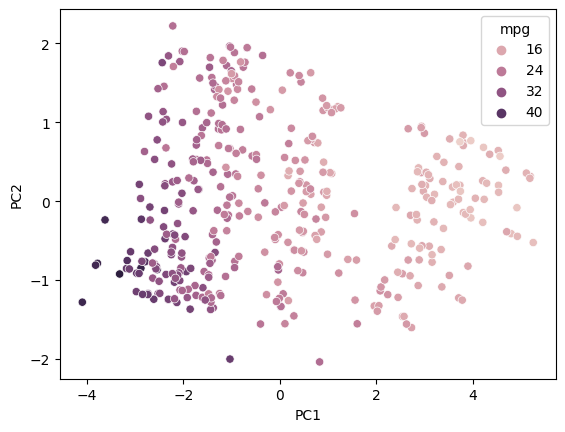

In [48]:
sns.scatterplot(x=df_concat[0], y = df_concat[1],hue = df_concat.mpg,data=df_concat) # Complete the code

plt.xlabel("PC1")

plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

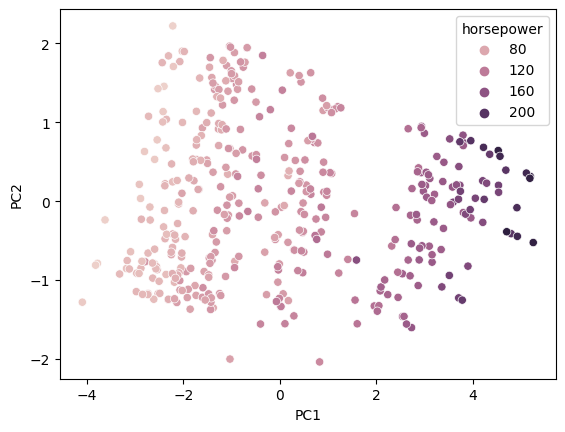

In [49]:
sns.scatterplot(x=df_concat[0], y = df_concat[1],hue = df_concat.horsepower,data=df_concat) # Complete the code

plt.xlabel("PC1")

plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

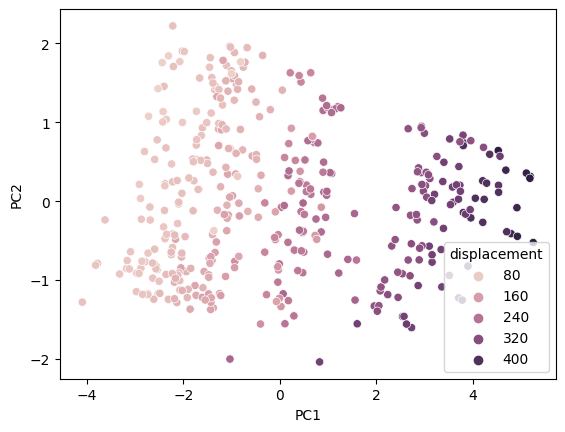

In [50]:
sns.scatterplot(x=df_concat[0], y = df_concat[1],hue = df_concat.displacement,data=df_concat) # Complete the code

plt.xlabel("PC1")

plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

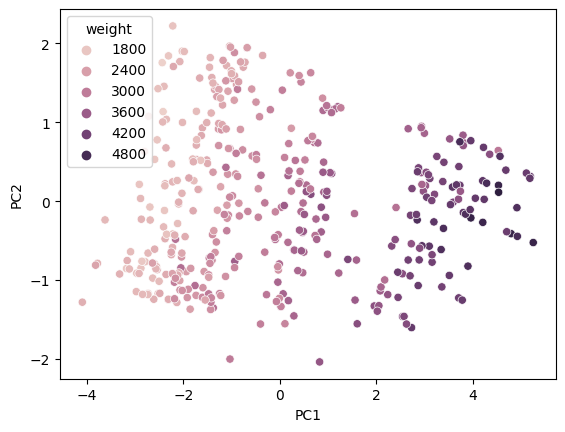

In [51]:
sns.scatterplot(x=df_concat[0], y = df_concat[1],hue = df_concat.weight,data=df_concat) # Complete the code

plt.xlabel("PC1")

plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

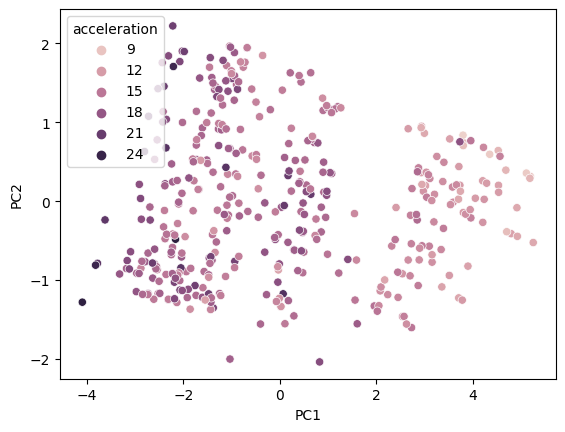

In [52]:
sns.scatterplot(x=df_concat[0], y = df_concat[1],hue = df_concat.acceleration,data=df_concat) # Complete the code

plt.xlabel("PC1")

plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

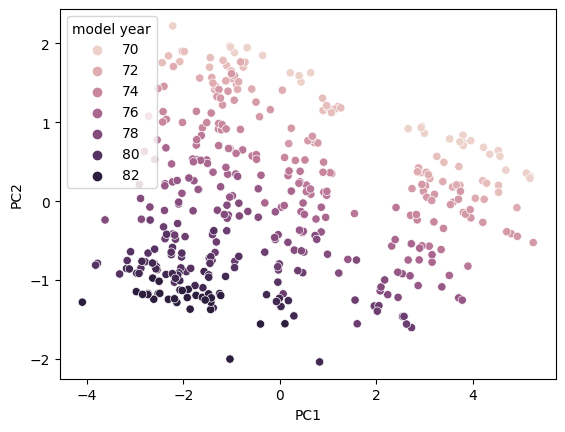

In [55]:
sns.scatterplot(x=df_concat[0], y = df_concat[1],hue = df_concat['model year'],data=df_concat) # Complete the code

plt.xlabel("PC1")

plt.ylabel("PC2")

**Write your observations here:________**

## **t-SNE**

In [61]:
# Apply the t-SNE algorithm with random_state = 1
tsne = TSNE(n_components = 2, random_state = 1) # Complete the code

# Fit and transform t-SNE function on the scaled data
data_tsne = tsne.fit_transform(data_scaled) # Complete the code

In [62]:
data_tsne.shape

(398, 2)

In [63]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [64]:
data_tsne.head()

,Component 1,Component 2
0,37.579971,2.138400
1,38.064915,0.073901
2,38.115463,1.203496
3,37.521984,1.321069
4,38.225060,1.684076


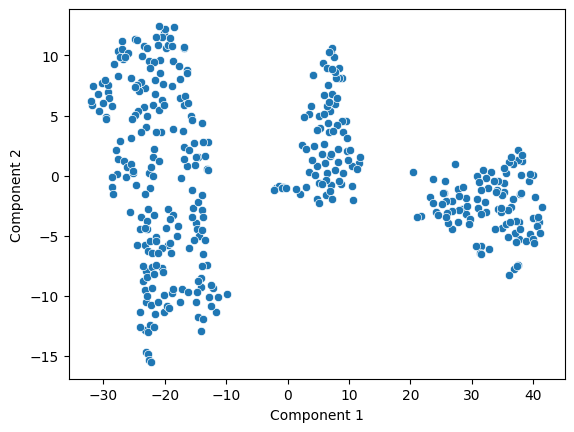

In [68]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])

plt.show()

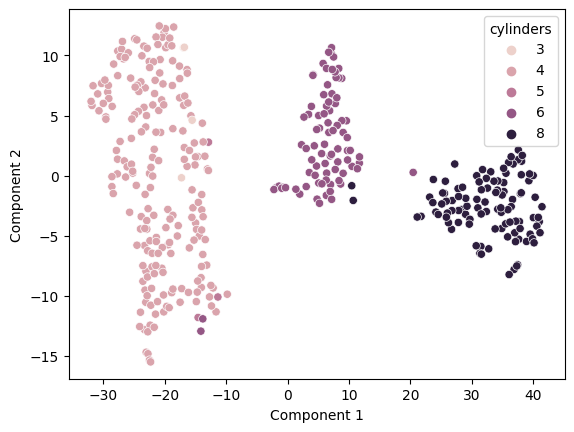

In [69]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)

plt.show()

**Write your observations here:________**

In [70]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']

    second_component = x['Component 2']

    if (first_component > 0) and (second_component > -5):
        return 'group_1'

    if (first_component > -20 ) and (first_component < 5):
        return 'group_2'

    else:
        return 'group_3'

In [71]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

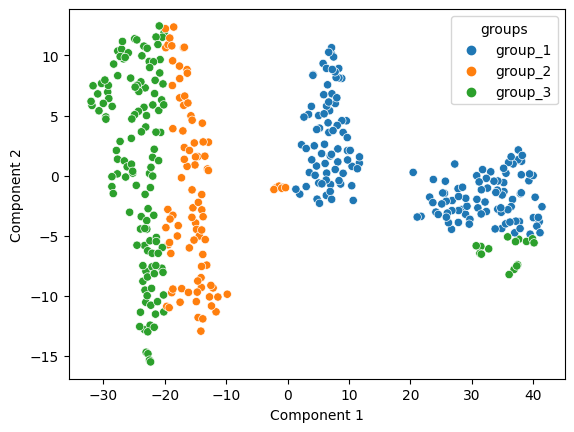

In [72]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [73]:
data['groups'] = data_tsne['groups']

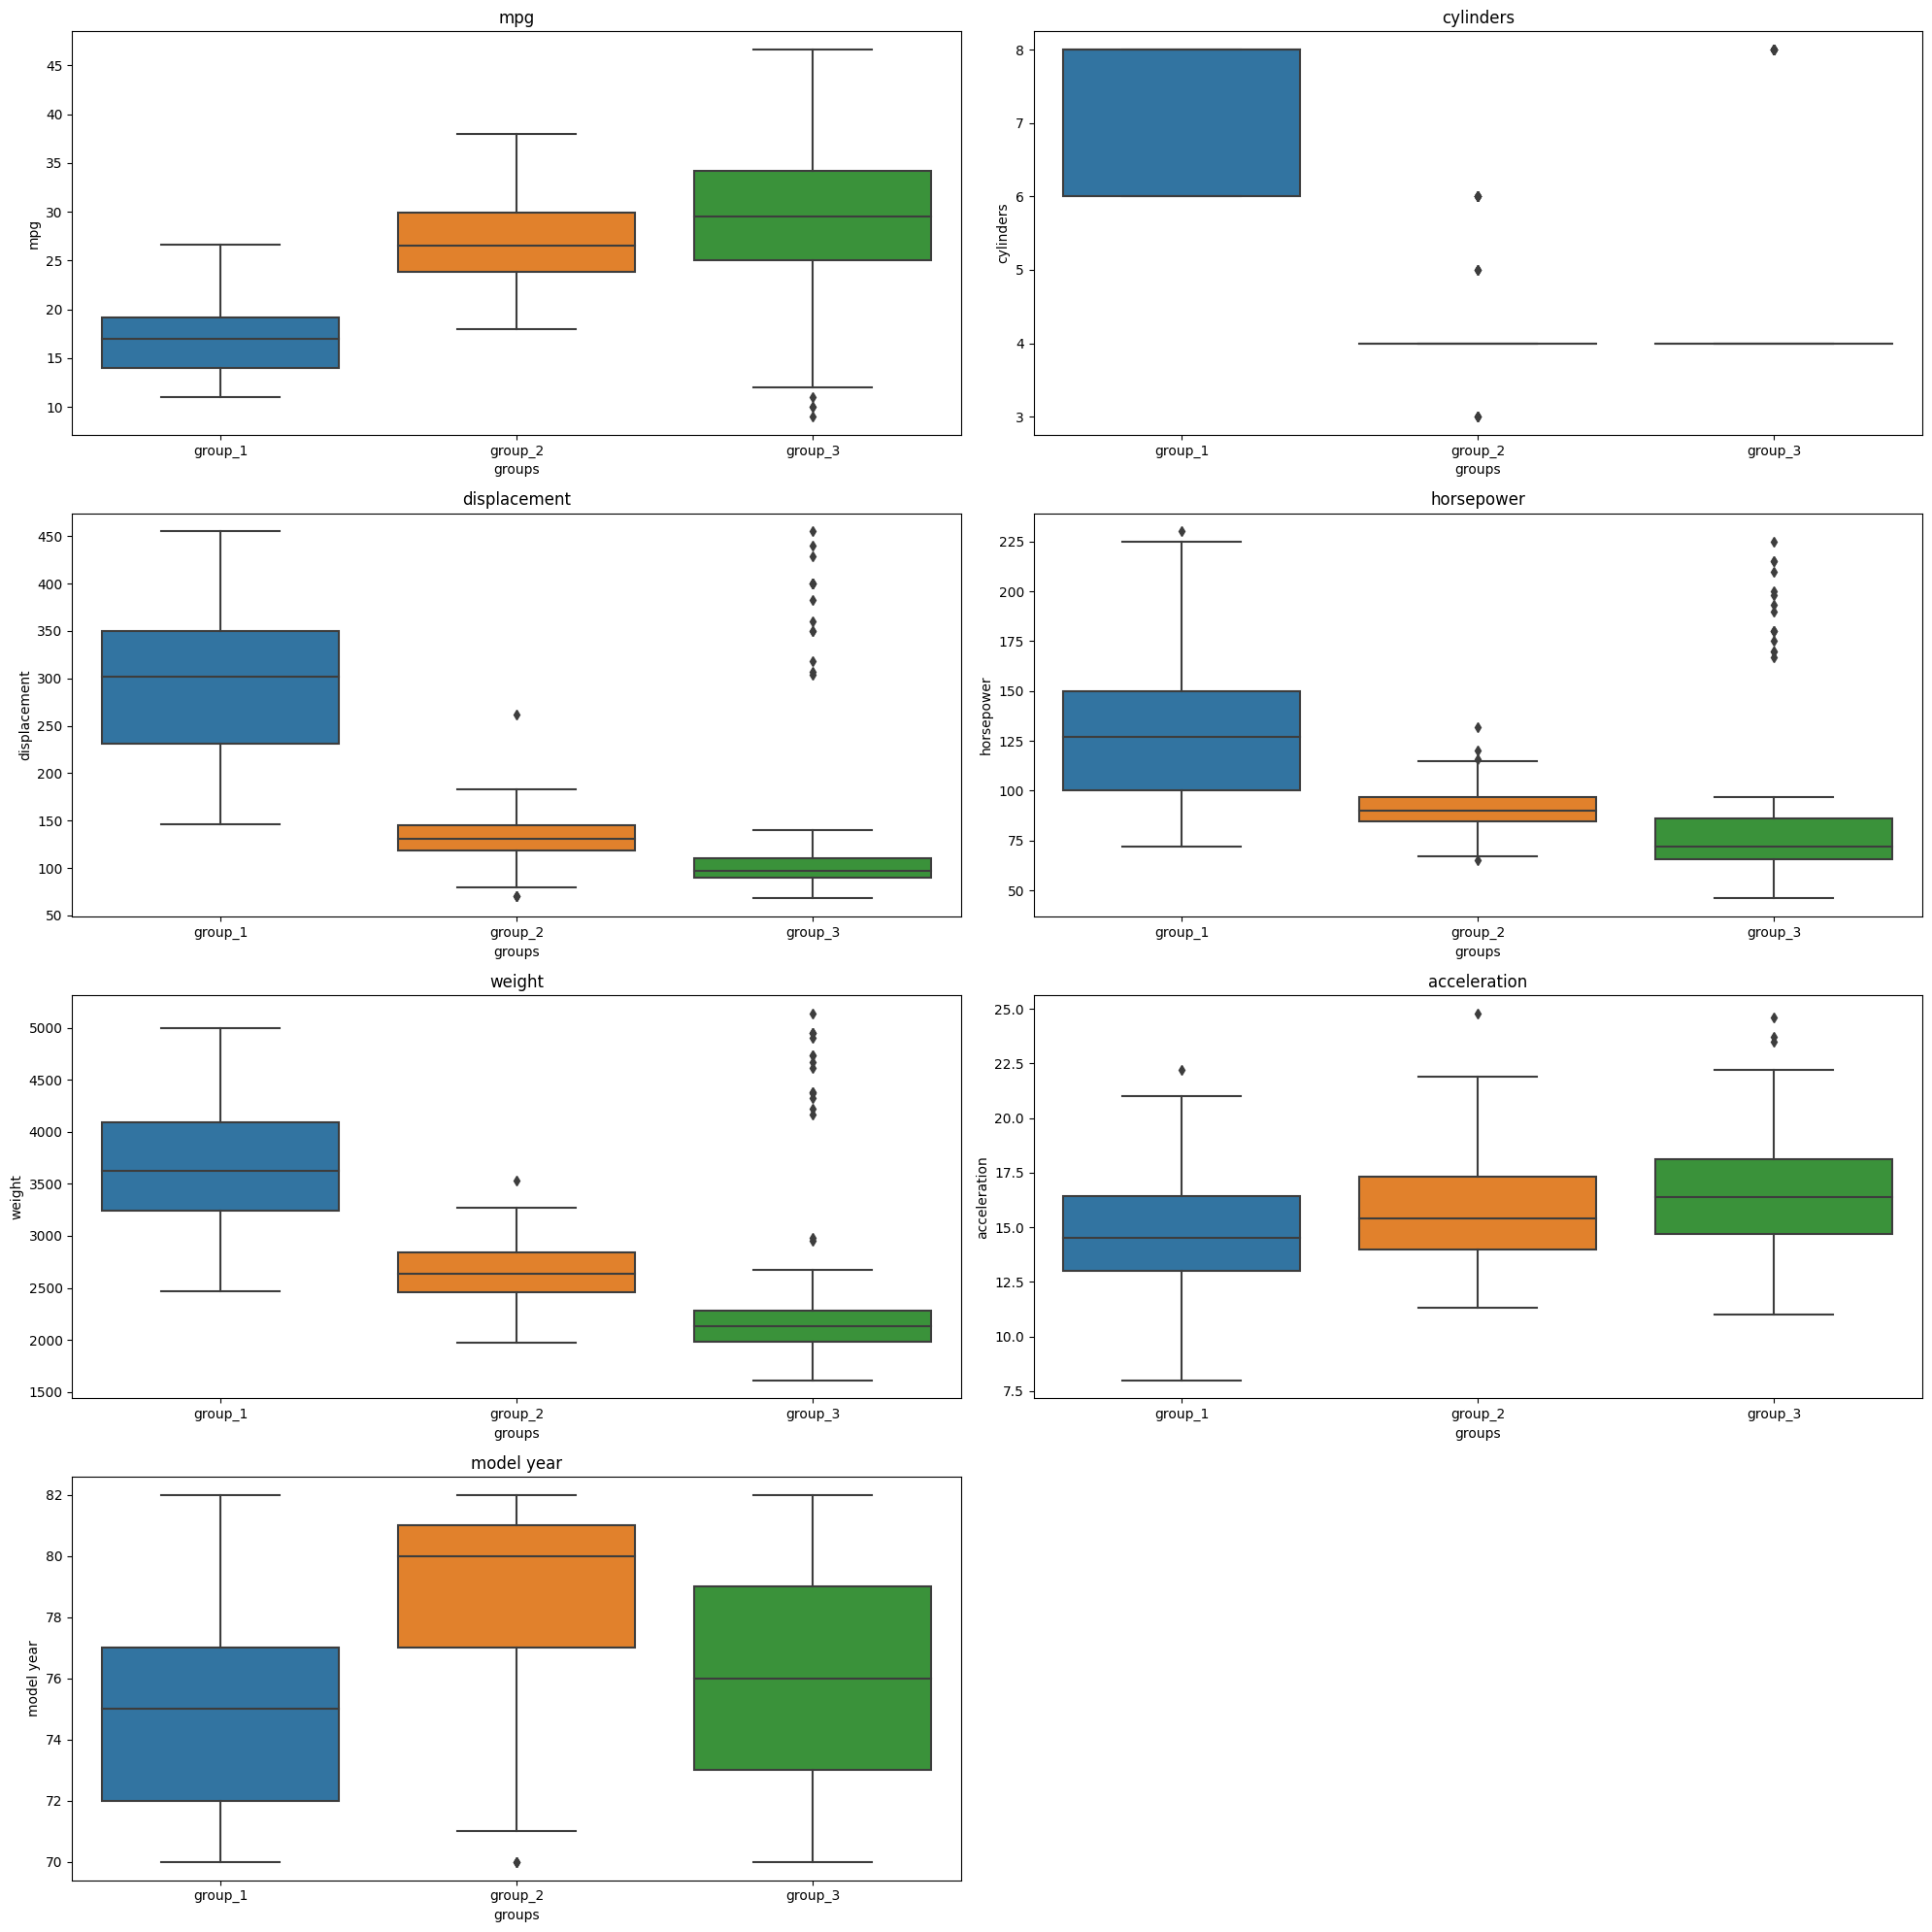

In [78]:
all_col = data.columns.tolist()

plt.figure(figsize = (20, 20))

for i, variable in enumerate(all_col):
    if i == 7:
        break

    plt.subplot(4, 2, i + 1)

    # Create the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')
    sns.boxplot(x = data['groups'], y=data[variable]) # Complete the code

    plt.tight_layout()

    plt.title(variable)

plt.show()

## **Conclusion and Business Recommendations**

**Write your Conclusion and Business Recommendations here:** There is a bigger population of vehicles of 4 cylinders than of other quantities. Also there is no big difference between the horsepower and acceleration, but there can be seen that a big difference exists between the milles per gallon. As the number of cylinders increases, the consumption of gas gallons increases too.

So, according with these results, the recommendation would be to keep increasing the number of vehicles of 4 cylinders of more recent years.